# Mapping a sphere to optimal colors

October 27, 2020

In [1]:
from colormath.color_objects import SpectralColor, xyYColor, sRGBColor
from colormath.color_conversions import convert_color
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

## Plotting spectral colors

`colormath` has discretized to 50 spectral input wavelengths, which I display.


In [2]:
SpectralColor()

SpectralColor(spec_340nm=0.0,spec_350nm=0.0,spec_360nm=0.0,spec_370nm=0.0,spec_380nm=0.0,spec_390nm=0.0,spec_400nm=0.0,spec_410nm=0.0,spec_420nm=0.0,spec_430nm=0.0,spec_440nm=0.0,spec_450nm=0.0,spec_460nm=0.0,spec_470nm=0.0,spec_480nm=0.0,spec_490nm=0.0,spec_500nm=0.0,spec_510nm=0.0,spec_520nm=0.0,spec_530nm=0.0,spec_540nm=0.0,spec_550nm=0.0,spec_560nm=0.0,spec_570nm=0.0,spec_580nm=0.0,spec_590nm=0.0,spec_600nm=0.0,spec_610nm=0.0,spec_620nm=0.0,spec_630nm=0.0,spec_640nm=0.0,spec_650nm=0.0,spec_660nm=0.0,spec_670nm=0.0,spec_680nm=0.0,spec_690nm=0.0,spec_700nm=0.0,spec_710nm=0.0,spec_720nm=0.0,spec_730nm=0.0,spec_740nm=0.0,spec_750nm=0.0,spec_760nm=0.0,spec_770nm=0.0,spec_780nm=0.0,spec_790nm=0.0,spec_800nm=0.0,spec_810nm=0.0,spec_820nm=0.0,spec_830nm=0.0)

These functions will help me plot spectral colors. I show the xy (chromaticity) coordinates for different spectral colors.

 To show color, I map from xyY to sRGB, plotted at maximum luminance for that color. The RGB values are printed out.


In [3]:
def get_spectral_data(lst, lum_ratio):
    inp = SpectralColor(*lst)
    xyY = convert_color(inp, xyYColor)
    x, y, _ = xyY.get_value_tuple()
    # using sRGB color
    sRGBtup = convert_color(xyY, sRGBColor).get_value_tuple()
    # resize to lum_ratio * maximum luminance
    rgb = (np.array(sRGBtup)/max(sRGBtup) if max(sRGBtup) != 0 else np.zeros(3))*lum_ratio
    return x, y, rgb

In [4]:
def plot_spectral(lst, text=''):
    x, y, rgb = get_spectral_data(lst, 1)
    print(text + str(rgb))
    plt.scatter(x, y,  c= np.array([rgb]))

In [5]:
def plot_wavelengths(lambda_start_no, lambda_end_no, strength=4):
    """Gets each discretized wavelength and plot x,y values"""
    for l in range(lambda_start_no, lambda_end_no):
        lst = np.zeros(50)
        lst[l] = strength
        plot_spectral(lst, str(340+10*l) + ' nm: ')
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("xy for different $\lambda$")
    plt.xlim(-0.1, 0.9)
    plt.ylim(-0.1, 0.9)

340 nm: [0. 0. 0.]
350 nm: [0. 0. 0.]
360 nm: [0.12022822 0.         1.        ]
370 nm: [0.11788055 0.         1.        ]
380 nm: [0.11578653 0.         1.        ]
390 nm: [0.11490754 0.         1.        ]
400 nm: [0.18488722 0.         1.        ]
410 nm: [0.2817763 0.        1.       ]
420 nm: [0.32657222 0.         1.        ]
430 nm: [0.32917182 0.         1.        ]
440 nm: [0.30668664 0.         1.        ]
450 nm: [0.24191948 0.         1.        ]
460 nm: [0. 0. 1.]
470 nm: [0.         0.11549632 1.        ]
480 nm: [0.         0.44617455 1.        ]
490 nm: [0.         0.80518659 1.        ]
500 nm: [0.         1.         0.71892742]
510 nm: [0.        1.        0.3497364]
520 nm: [0. 1. 0.]
530 nm: [0. 1. 0.]
540 nm: [0. 1. 0.]
550 nm: [0. 1. 0.]
560 nm: [0.4639961 1.        0.       ]
570 nm: [0.89691664 1.         0.        ]
580 nm: [1.         0.74836874 0.        ]
590 nm: [1.         0.50635686 0.        ]
600 nm: [1.         0.29782026 0.        ]
610 nm: [1. 0. 0

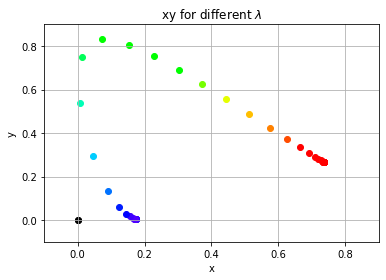

In [6]:
plot_wavelengths(0, 50)

I think the values 10-29 (430-620nm) inclusive look good and spaced out, so I will use those as my spectrum.

440 nm: [0.30097165 0.         1.        ]
450 nm: [0.23611672 0.         1.        ]
460 nm: [0. 0. 1.]
470 nm: [0.         0.10781325 1.        ]
480 nm: [0.         0.44031045 1.        ]
490 nm: [0.         0.80241192 1.        ]
500 nm: [0.         1.         0.71504326]
510 nm: [0.        1.        0.3424102]
520 nm: [0. 1. 0.]
530 nm: [0. 1. 0.]
540 nm: [0. 1. 0.]
550 nm: [0. 1. 0.]
560 nm: [0.45886212 1.         0.        ]
570 nm: [0.89582127 1.         0.        ]
580 nm: [1.         0.74605363 0.        ]
590 nm: [1.         0.50229997 0.        ]
600 nm: [1.         0.29252136 0.        ]
610 nm: [1. 0. 0.]
620 nm: [1. 0. 0.]
630 nm: [1. 0. 0.]


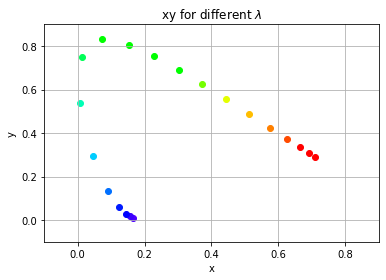

In [7]:
plot_wavelengths(10, 30, 3)

## Plotting optimal colors

I assign the visible spectrum to be linear in wavelength. So I assign a center wavelength `q` and passband width `w` that wraps around the chosen spectrum.

In [8]:
def get_offsets(w, q, L):
    """returns w numbers centered at q, mod L"""
    return np.array(range(-int((w-1)/2)+q, int((w-1)/2)+1+q)) % L

In [9]:
# some unit tests
assert list(get_offsets(5, 0, 10)) == [8, 9, 0, 1, 2]
assert list(get_offsets(5, 2, 10)) == [0, 1, 2, 3, 4]

In [10]:
def convert_wqLo_to_spectral(w, q, L, offset):
    """
    Gets spectrum of optimal color given starting wavelength number q (from 0 to L) and width w.
    Will use only L of 50 spectral wavelengths, starting at offset."""
    assert w % 2 == 1
    zs = np.zeros(L)
    zs[get_offsets(w, q, L)] = 1
    lst = np.concatenate((np.zeros(offset), zs, np.zeros(50-L-offset)), axis=None)
    lst = lst/sum(lst)
    return lst

In [11]:
def plot_optimal(w, q, L, offset, strength):
    """
    Plots optimal color given starting wavelength number q (from 0 to L) and width w.
    Will use only L of 50 spectral wavelengths, starting at offset."""
    lst = convert_wqLo_to_spectral(w,q,L, offset)
    lst = lst * strength/sum(lst)
    plot_spectral(lst, 'centered at ' + str(340 + 10*(offset+q)) + ' nm: ')

In [12]:
def plot_kunal_optimal_by_w(w, strength=3):
    """
    This is my preferred choice of spectrum.
    w goes from 0 to L.
    """
    L=20
    offset=10
    for q in range(L):
        plot_optimal(w, q, L, offset, strength)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("xy for optimal colors, passband fraction=" + str(w/L))
    plt.xlim(-0.1,0.9)
    plt.ylim(-0.1, 0.9)

centered at 440 nm: [0.68635651 0.         1.        ]
centered at 450 nm: [0.21183044 0.         1.        ]
centered at 460 nm: [0. 0. 1.]
centered at 470 nm: [0.         0.14591578 1.        ]
centered at 480 nm: [0.         0.43363174 1.        ]
centered at 490 nm: [0.         0.78177378 1.        ]
centered at 500 nm: [0.         1.         0.72683169]
centered at 510 nm: [0.         1.         0.36508167]
centered at 520 nm: [0. 1. 0.]
centered at 530 nm: [0. 1. 0.]
centered at 540 nm: [0. 1. 0.]
centered at 550 nm: [0. 1. 0.]
centered at 560 nm: [0.48178983 1.         0.        ]
centered at 570 nm: [0.90567186 1.         0.        ]
centered at 580 nm: [1.         0.75430722 0.        ]
centered at 590 nm: [1.         0.52069076 0.        ]
centered at 600 nm: [1.         0.31957328 0.        ]
centered at 610 nm: [1.         0.06342404 0.        ]
centered at 620 nm: [1. 0. 0.]
centered at 630 nm: [1.         0.         0.71934667]


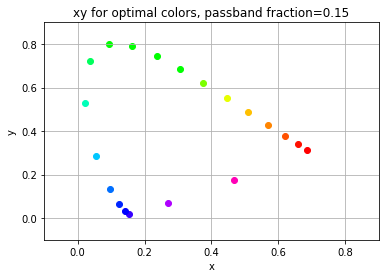

In [13]:
plot_kunal_optimal_by_w(3)

centered at 440 nm: [0.95641604 0.         1.        ]
centered at 450 nm: [0.764989 0.       1.      ]
centered at 460 nm: [0.5084108  0.22161526 1.        ]
centered at 470 nm: [0.         0.40971607 1.        ]
centered at 480 nm: [0.         0.56560814 1.        ]
centered at 490 nm: [0.         0.78195199 1.        ]
centered at 500 nm: [0.         1.         0.93290179]
centered at 510 nm: [0.         1.         0.64562298]
centered at 520 nm: [0.        1.        0.3894143]
centered at 530 nm: [0.         1.         0.05995523]
centered at 540 nm: [0. 1. 0.]
centered at 550 nm: [0.28057844 1.         0.        ]
centered at 560 nm: [0.65560455 1.         0.        ]
centered at 570 nm: [0.93293025 1.         0.        ]
centered at 580 nm: [1.         0.82711367 0.        ]
centered at 590 nm: [1.         0.66217732 0.        ]
centered at 600 nm: [1.         0.53606144 0.31529217]
centered at 610 nm: [1.         0.40080586 0.55452954]
centered at 620 nm: [1.         0.24077073 

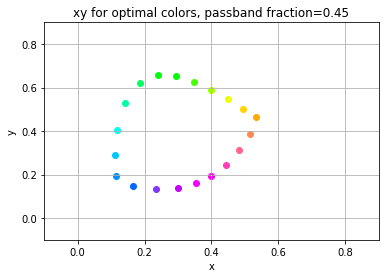

In [14]:
plot_kunal_optimal_by_w(9)

centered at 440 nm: [1.         0.62403608 0.95887227]
centered at 450 nm: [0.94778451 0.66460725 1.        ]
centered at 460 nm: [0.81048284 0.72345969 1.        ]
centered at 470 nm: [0.62626093 0.80531355 1.        ]
centered at 480 nm: [0.32509081 0.89377209 1.        ]
centered at 490 nm: [0.         0.97491036 1.        ]
centered at 500 nm: [0.        1.        0.9603375]
centered at 510 nm: [0.         1.         0.91705801]
centered at 520 nm: [0.         1.         0.79551615]
centered at 530 nm: [0.36855083 1.         0.64904934]
centered at 540 nm: [0.59003265 1.         0.47214512]
centered at 550 nm: [0.73834836 1.         0.25536237]
centered at 560 nm: [0.8473398 1.        0.       ]
centered at 570 nm: [0.8957206  1.         0.30390802]
centered at 580 nm: [0.96349963 1.         0.55230128]
centered at 590 nm: [1.         0.94713333 0.71526835]
centered at 600 nm: [1.         0.85135639 0.7949356 ]
centered at 610 nm: [1.         0.75811495 0.83819793]
centered at 620 

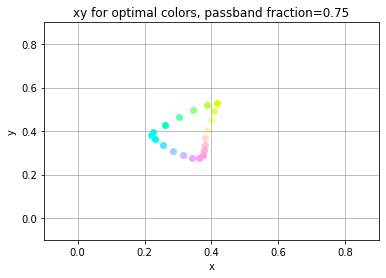

In [15]:
plot_kunal_optimal_by_w(15)

## Plotting as a sphere

The colors plotted above are using maximum luminance of a given color in the sRGB space.
I will adjust this to plot using luminance `w/L` of maximum. 
Note that this might not be the correct luminance; it is scaled to the maximum luminance given sRGB. Another strategy could be to calculate the luminance properly in the xyY model, then clamp the RGB values using a `colormath` method.

Additionally, I will plot the colors on concentric circles, to imitate cross-sections of a sphere's surface.

In [16]:
def plot_kunal_optimal_circles_by_w(w):
    """
    w must be odd, from 0 to 20
    """
    L=20
    offset=10
    z = 2*w/L - 1
    rho = 1 - z*z
    plt.figure(figsize=(5,5))
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.title('passband fraction=' + str(w/L))
    for q in range(L):
        lst = convert_wqLo_to_spectral(w,q,L,offset)
        _, _, color = get_spectral_data(lst, w/L)
        theta = q*2*np.pi/L
        plt.scatter(rho*np.cos(theta),rho*np.sin(theta), c=[color],s=200)

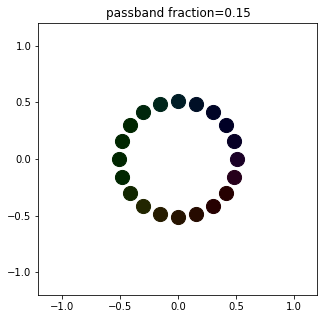

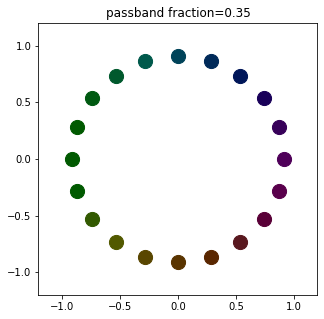

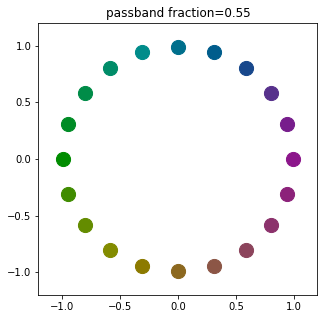

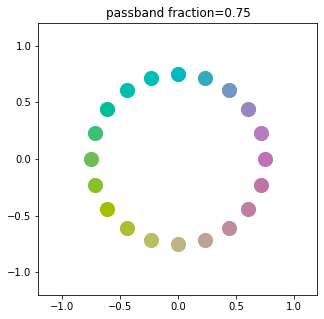

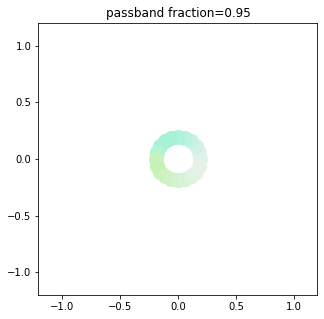

In [17]:
for w in [3,7,11,15,19]:
    plot_kunal_optimal_circles_by_w(w)

I think the colors are quite dark to my eye and hard to distinguish. This could be helped by using the proper xyY luminance value, but I am not sure of the right value for `colormath`.
